In [50]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
pd.set_option('display.max_rows', None)

In [78]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"#proportion_pxt_neh/"
time=9
pw=0.046

In [79]:
data=pd.read_csv(path+"__CPSM_MOUSE.csv")
# data=data[data.exp_Time==time]
data=data[data.exp_Time==time].reset_index(drop="True")

data=data[['Peptied', 'charge', 'exp_Time', 'NEH', 
       'NEH_new', 'new_error', 'new_cor', 'new_rsq', 'map', 'mean', 'median',
       'sd']]
data["dif"]=abs(data.NEH - data.NEH_new)
print(data.shape)

data=data[data.new_cor>0.9]
print(data.shape) 

data=data[data.new_rsq>0.9]
print(data.shape)

# data=data[data.new_error<0.05]
# print(data.shape) 

# data=data[data["mean"]<0.016]
# print(data.shape) 

data.sort_values(by="dif")

(56, 13)
(30, 13)
(21, 13)


,Peptied,charge,exp_Time,NEH,NEH_new,new_error,new_cor,new_rsq,map,mean,median,sd,dif
19,FVHDNYVIR,2,9,12,11,0.035578,0.975392,0.943395,0.197986,0.025153,0.016831,0.025161,1
49,EIEYEVVR,2,9,17,16,0.035953,0.960805,0.922876,0.173132,0.025723,0.012894,0.025119,1
31,LFAEAVQK,2,9,17,16,0.039044,0.959504,0.919557,0.124816,0.026808,0.015373,0.028386,1
46,FVHDNYVIR,3,9,12,10,0.027592,0.985386,0.965784,0.162690,0.019461,0.011282,0.019559,2
42,TFEESFQK,2,9,15,13,0.029727,0.979395,0.956802,0.119094,0.020800,0.013402,0.021238,2
29,EWPANLDLK,2,9,16,13,0.030259,0.978792,0.954057,0.125726,0.021243,0.012884,0.021548,3
45,ETLIDLGTK,2,9,11,14,0.047250,0.955821,0.904755,0.181058,0.033431,0.024463,0.033390,3
32,IMGTSPLQIDR,2,9,20,16,0.038013,0.954551,0.905040,0.184524,0.026954,0.020761,0.026805,4
35,IALGIPLPEIK,2,9,19,15,0.036424,0.963156,0.923335,0.170101,0.025241,0.017870,0.026259,4
44,SIFSAVLDELK,2,9,18,14,0.037159,0.964226,0.923925,0.179260,0.025785,0.018404,0.026757,4


In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

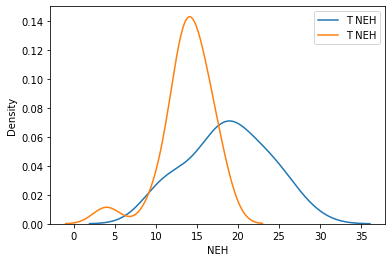

In [81]:
sns.kdeplot(data.NEH, x="NEH",label="T NEH")
sns.kdeplot(data.NEH_new, x="NEH_new",label="T NEH")
plt.legend()

(array([3., 2., 0., 2., 0., 3., 0., 3., 2., 0., 3., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.  ,  1.56,  2.12,  2.68,  3.24,  3.8 ,  4.36,  4.92,  5.48,
         6.04,  6.6 ,  7.16,  7.72,  8.28,  8.84,  9.4 ,  9.96, 10.52,
        11.08, 11.64, 12.2 , 12.76, 13.32, 13.88, 14.44, 15.  ]),
 <BarContainer object of 25 artists>)

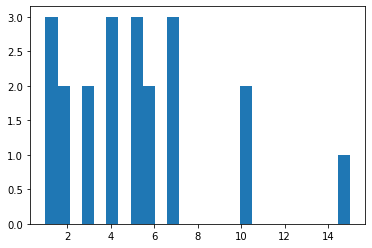

In [82]:
plt.hist(data.dif,bins=25)